In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm
from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

from matplotlib import gridspec

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


In [3]:
#12 model colours for 12 models, generated using https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']


In [4]:
# Constants

rho_fw = 1000 #kg/m3
L = 3.34e5 #J/kg
rho_sw = 1028 #kg/m3
Cw = 3974

GammaT={'COCO':2.5e-2,
'FVCOM':.2,
'MITgcm BAS':1.9e-2,
'MITgcm BAS CoupledV3':2.1e-2,
'MITgcm JPL':3.25e-2,
'MOM6':1.4e-1,
'MOM6 SIGMA ZSTAR':4.5e-2,
'MPAS-Ocean':1.94e-2,
'NEMO-CNRS':2.6e-2,
'NEMO-UKESM1is':4.5e-2,
'POP2x':1.146e-1,
'ROMSUTAS':5e-2}

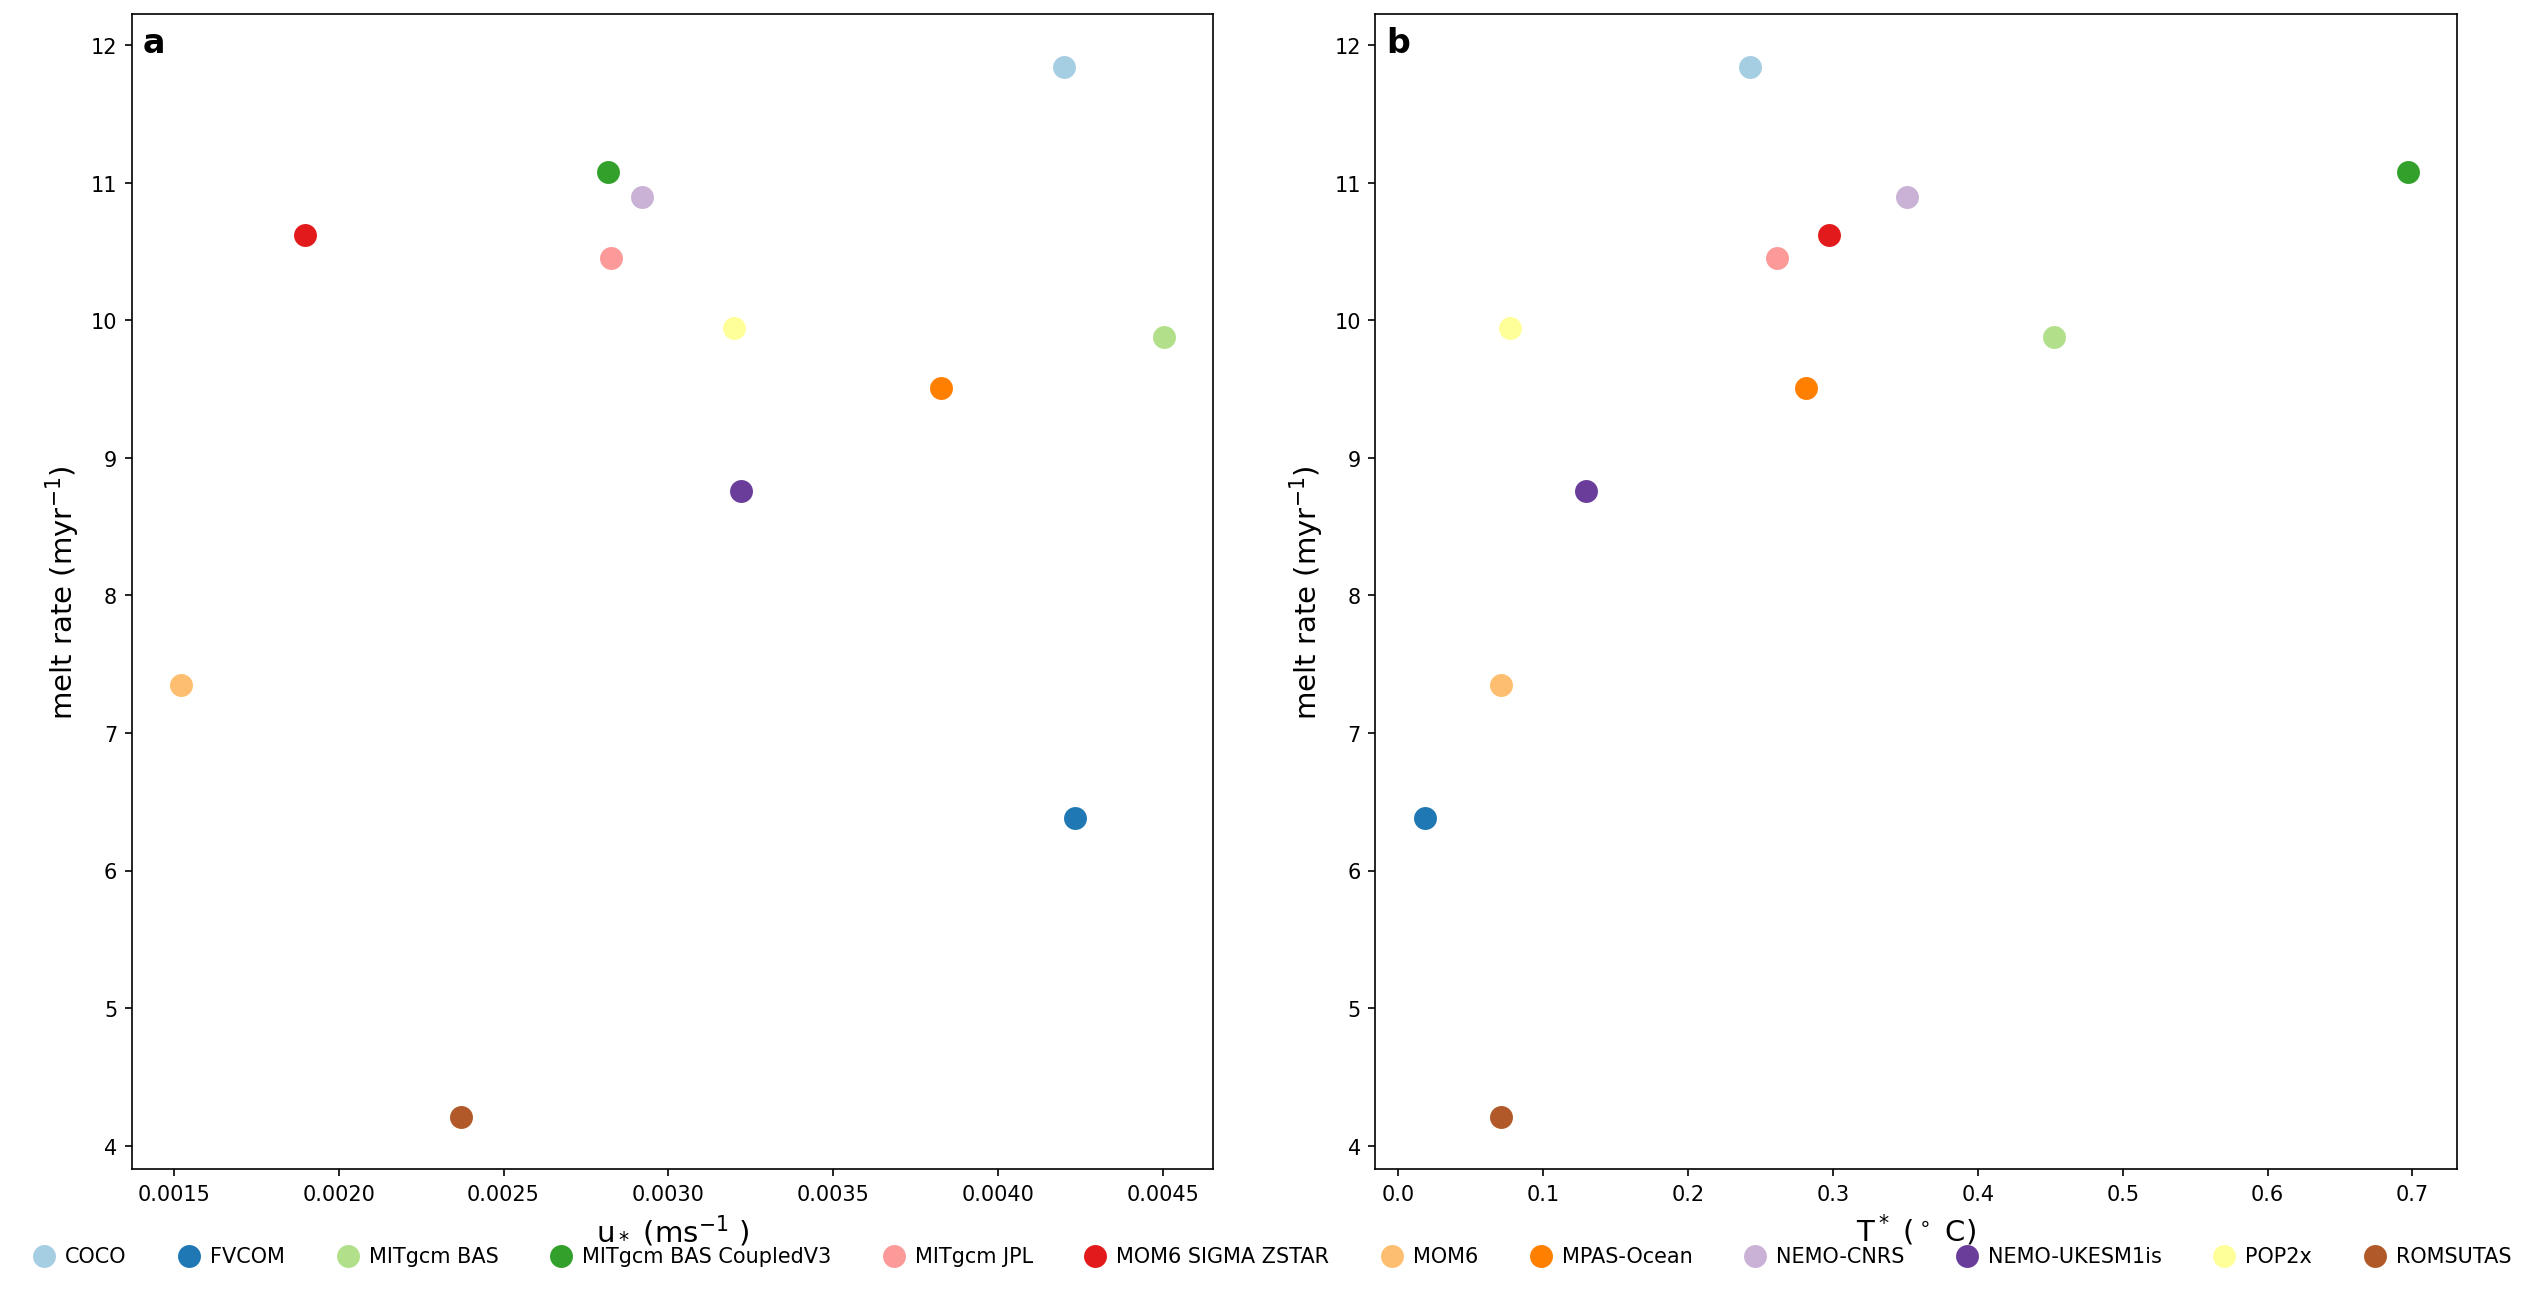

In [5]:
# scatter plot of melt rates aganst T^* and u_* for Ocean1_COM
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
#fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    fr = data.frictionVelocity
    mr = data.meltRate*365*24*60*60 # use this and .where() to mask out parts of domain that aren't melting

    # Mask out parts of the domain that aren't melting
    mr_masked = mr.where(mr < 1e36)#.where(mr != 0)
    fr_masked = fr.where(mr < 1e36)#.where(mr != 0)
    
    # Select the last 12 months
    mr_last_12 = mr_masked.isel(nTime=slice(-13, None))
    fr_last_12 = fr_masked.isel(nTime=slice(-13, None))
    
    # Compute the mean over the last 12 months across 'nx' and 'ny'
    mr_time_mean = mr_last_12.mean(['nx', 'ny', 'nTime'])
    fr_time_mean = fr_last_12.mean(['nx', 'ny', 'nTime'])
   
    #plt.plot(fr_time_mean, mr_time_mean, 'o', label=labels[i],color=modelcolours[i])
    ss = plt.scatter(fr_time_mean, mr_time_mean,label = labels[i], s = 100,color=modelcolours[i])
plt.text(0.01,0.99,'a', fontsize = 16, transform=ax.transAxes, fontweight='bold', va='top')
#plt.ylim(0,0.01)
plt.xlabel(r'u$_*$ ($\mathrm{ms^{-1}}$ )',fontsize=14)
plt.ylabel(r'melt rate ($\mathrm{myr^{-1}}$)',fontsize=14)

ax=fig.add_subplot(gs[1])

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    thr = data.thermalDriving
    mr = data.meltRate*365*24*60*60 # use this and .where() to mask out parts of domain that aren't melting
   # Mask out parts of the domain that aren't melting
    mr_masked = mr.where(mr < 1e36)#.where(mr != 0)
    thr_masked = thr.where(mr < 1e36)#.where(mr != 0)
    
    # Select the last 12 months
    mr_last_12 = mr_masked.isel(nTime=slice(-13, None))
    thr_last_12 = thr_masked.isel(nTime=slice(-13, None))
    
    # Compute the mean over the last 12 months across 'nx' and 'ny'
    mr_time_mean = mr_last_12.mean(['nx', 'ny', 'nTime'])
    thr_time_mean = thr_last_12.mean(['nx', 'ny', 'nTime'])
    
    ss = plt.scatter(thr_time_mean, mr_time_mean,label = labels[i], s = 100,color=modelcolours[i])
plt.text(0.01,0.99,'b', fontsize = 16, transform=ax.transAxes, fontweight='bold', va='top')    
plt.xlabel(r'T$^*$ ($\mathrm{^\circ}$ C)',fontsize=14)
plt.ylabel(r'melt rate ($\mathrm{myr^{-1}}$)',fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.05),frameon=False,ncol=length,handletextpad=0.01)

Text(0, 0.5, '$\\mathrm{Melt\\_div\\_constants (^\\circ C ms^{-1} )}$')

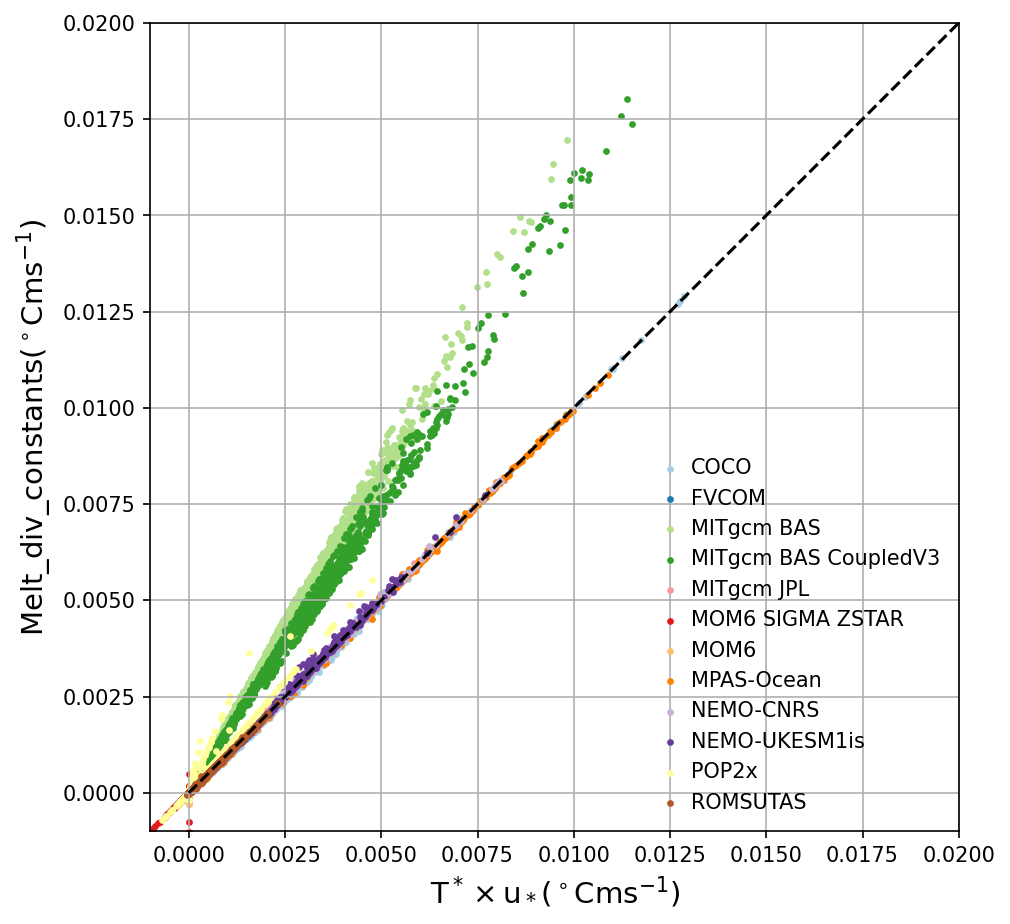

In [6]:
# scatter plot of melt rates divided by constants aganst T^* times u_* for Ocean1_COM

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))
    melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(melt_div_constants, tstar_av*ustar_av,s=5,color=modelcolours[i])
    ax.scatter(melt_div_constants[-1], tstar_av[-1]*ustar_av[-1], s=5,label=labels[i],color=modelcolours[i])
    
ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_xlim((-.001,0.02))
ax.set_ylim((-.001,0.02))
ax.set_aspect('equal')
ax.grid()
plt.xlabel(r'$\mathrm{T^*\times u_* (^\circ C  ms^{-1} )}$',fontsize=14)
plt.ylabel(r'$\mathrm{Melt\_div\_constants (^\circ C ms^{-1} )}$',fontsize=14)


Text(0.5, 0, '$\\mathrm{u_* (ms^{-1} )}$')

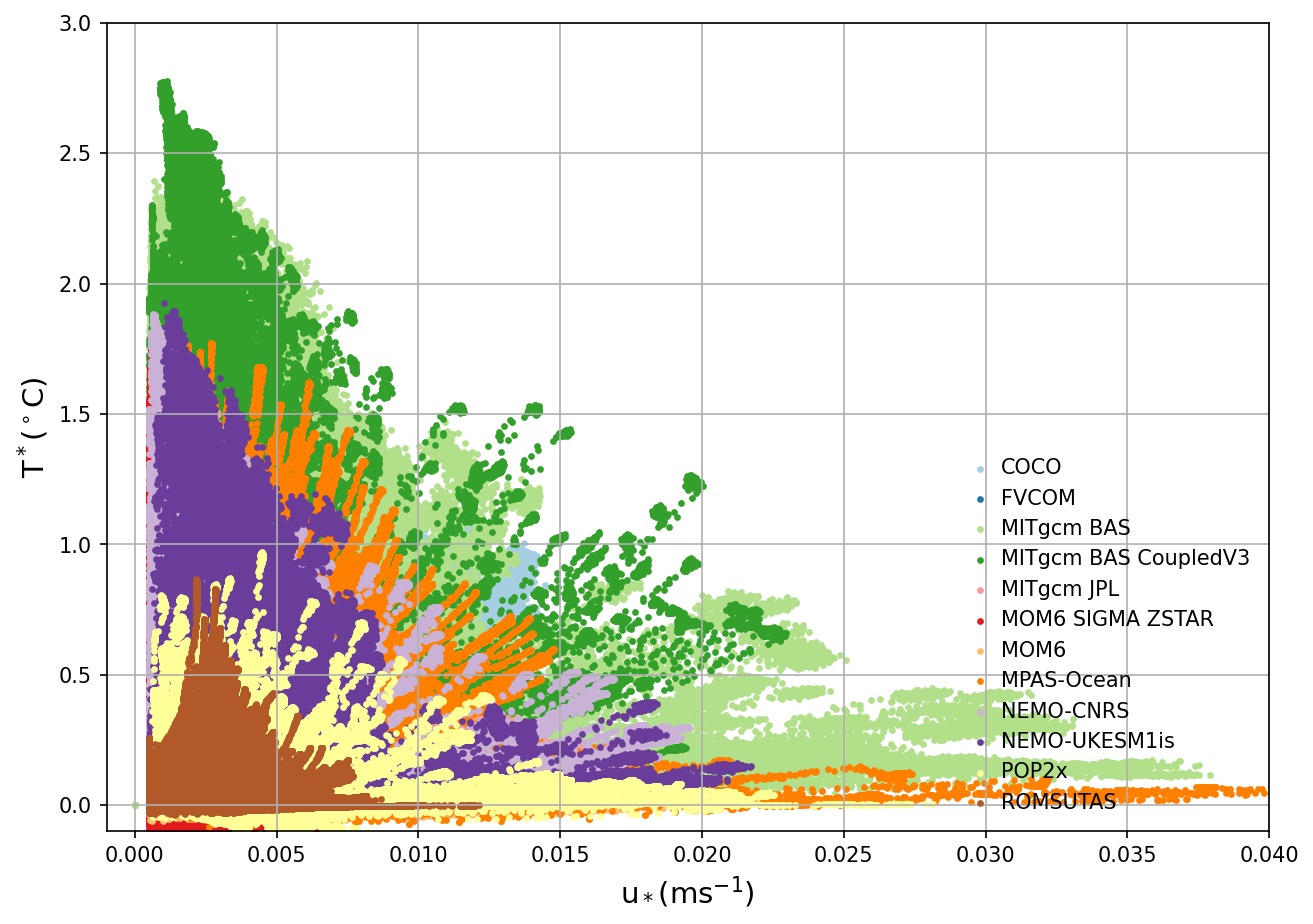

In [7]:
# scatter plot of  T^* against u_* for Ocean1_COM

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    # melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    # melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving#.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))#.mean(['nx','ny'])
    ustar = data.frictionVelocity#.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))#.mean(['nx','ny'])
    # melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(ustar_av, tstar_av,s=5,color=modelcolours[i],label=labels[i])
    
#ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_ylim((-.1,3))
ax.set_xlim((-.001,0.04))
#ax.set_aspect('equal')
ax.grid()
plt.ylabel(r'$\mathrm{T^* (^\circ C )}$',fontsize=14)
plt.xlabel(r'$\mathrm{u_* (ms^{-1} )}$',fontsize=14)


Text(0.5, 0, '$\\mathrm{u_* (ms^{-1} )}$')

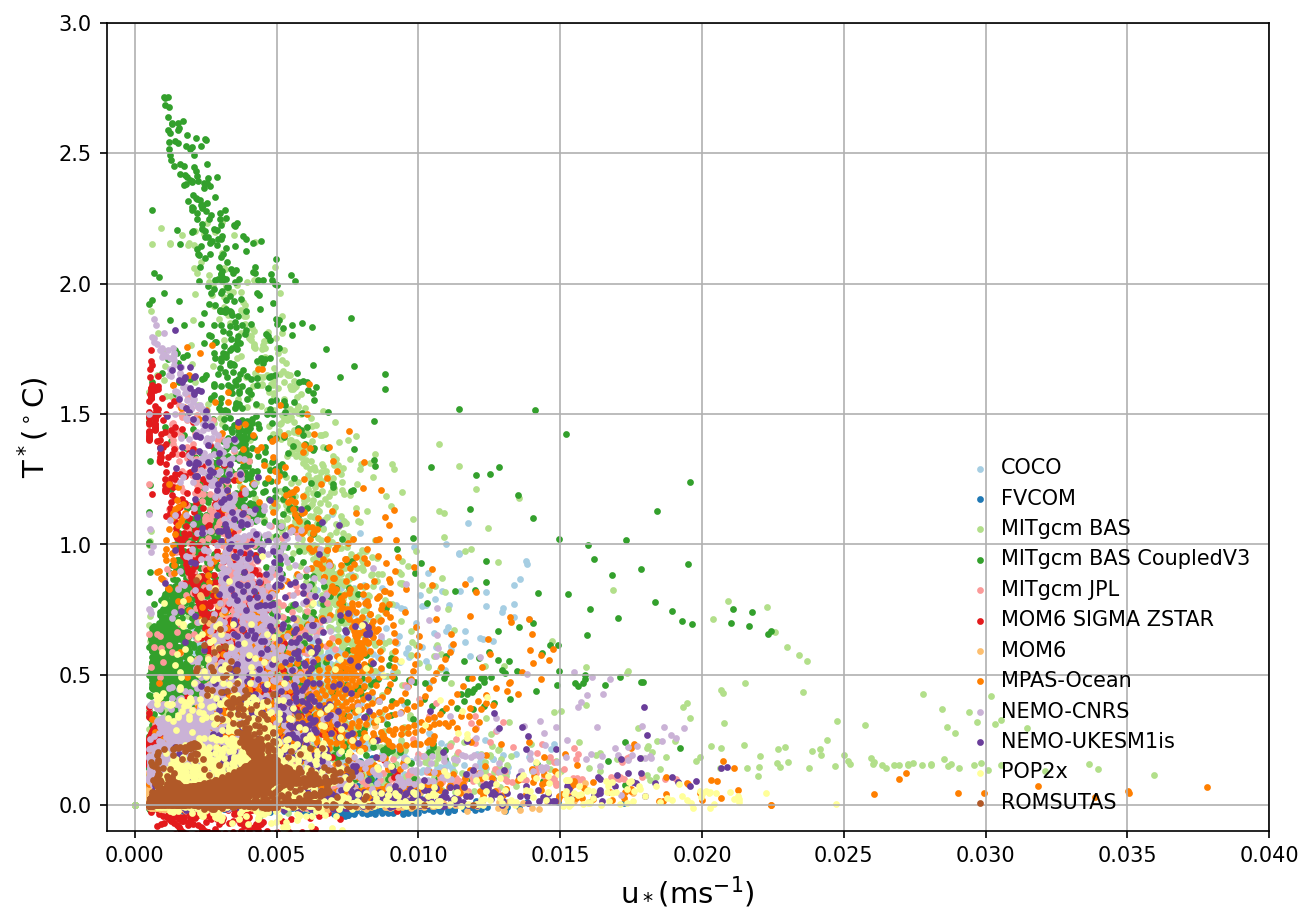

In [8]:
# scatter plot of  T^* against u_* for Ocean1_COM

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    # melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    # melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))#.mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))#.mean(['nx','ny'])
    # melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(ustar_av, tstar_av,s=5,color=modelcolours[i],label=labels[i])
    
#ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_ylim((-.1,3))
ax.set_xlim((-.001,0.04))
#ax.set_aspect('equal')
ax.grid()
plt.ylabel(r'$\mathrm{T^* (^\circ C )}$',fontsize=14)
plt.xlabel(r'$\mathrm{u_* (ms^{-1} )}$',fontsize=14)


Text(0.5, 0, '$\\mathrm{u_* (ms^{-1} )}$')

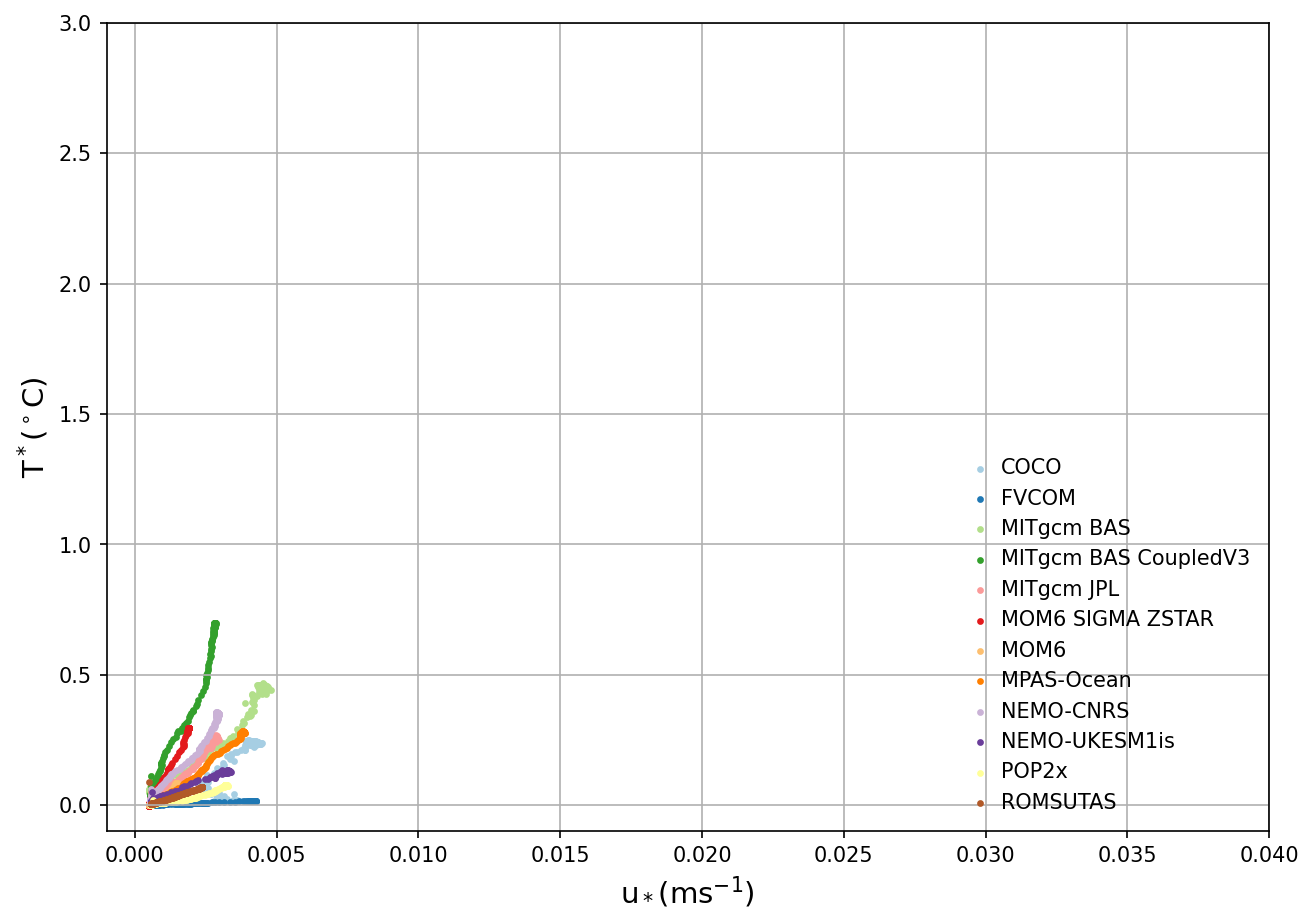

In [9]:
# scatter plot of  T^* against u_* for Ocean1_COM

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    # melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    # melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving#.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity#.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])
    # melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(ustar_av, tstar_av,s=5,color=modelcolours[i],label=labels[i])
    
#ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_ylim((-.1,3))
ax.set_xlim((-.001,0.04))
#ax.set_aspect('equal')
ax.grid()
plt.ylabel(r'$\mathrm{T^* (^\circ C )}$',fontsize=14)
plt.xlabel(r'$\mathrm{u_* (ms^{-1} )}$',fontsize=14)


In [116]:
labels

['COCO',
 'FVCOM',
 'MITgcm BAS',
 'MITgcm BAS CoupledV3',
 'MITgcm JPL',
 'MOM6 SIGMA ZSTAR',
 'MOM6',
 'MPAS-Ocean',
 'NEMO-CNRS',
 'NEMO-UKESM1is',
 'POP2x',
 'ROMSUTAS']

Text(0.5, 1.0, 'Ocean2 COM - Year 20')

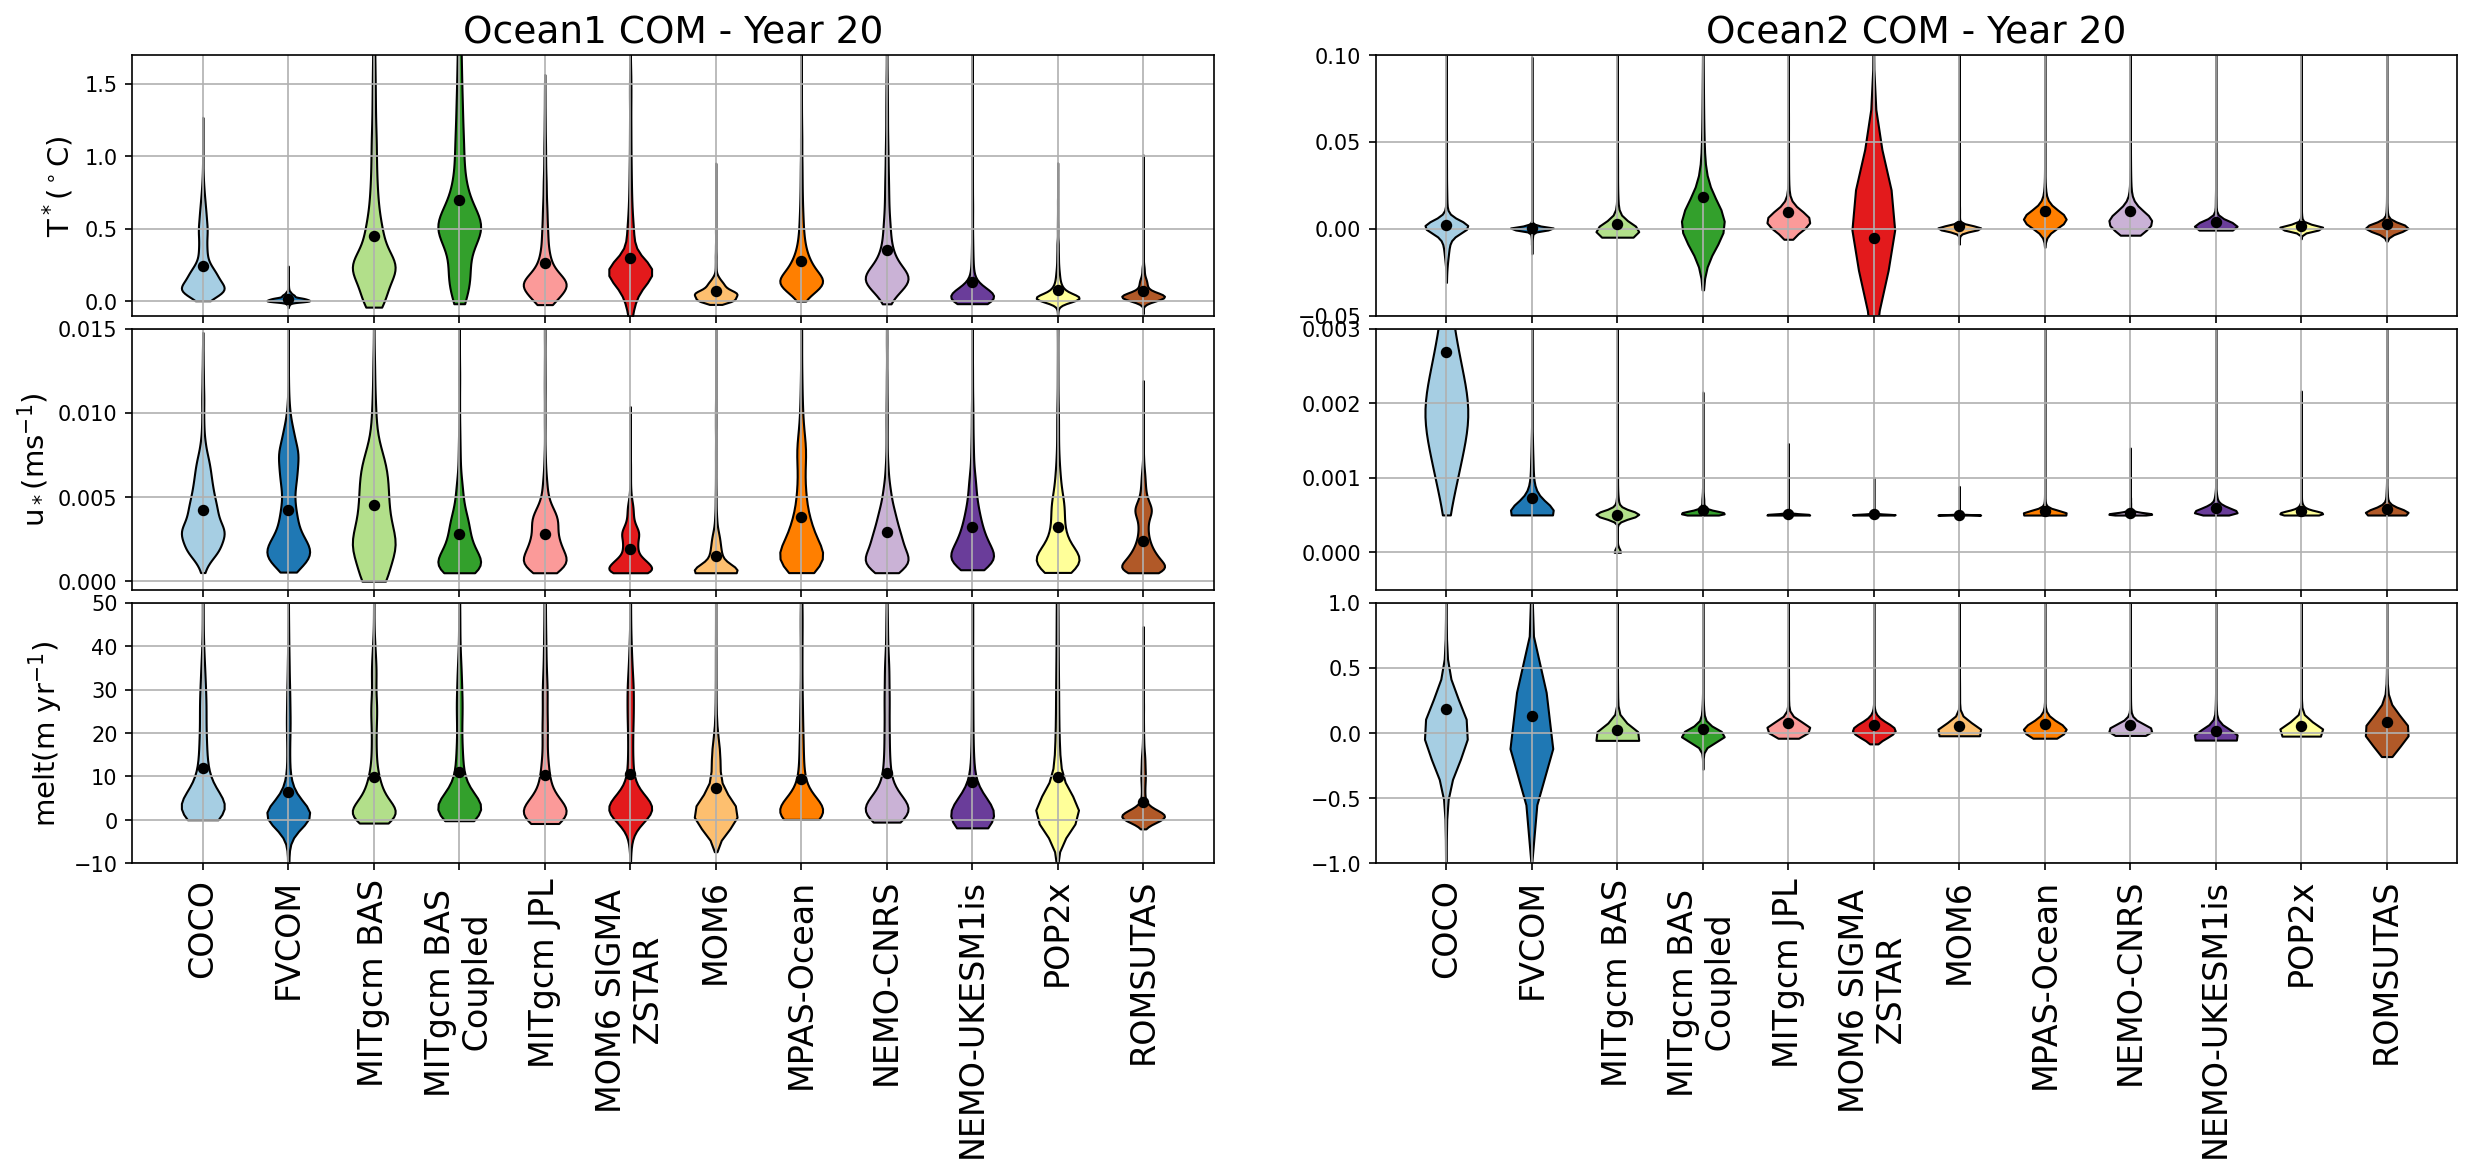

In [134]:
# box plot of  T^*, u^* and melt for Ocean1_COM
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

labels2 = ['COCO',
 'FVCOM',
 'MITgcm BAS',
 'MITgcm BAS \n Coupled',
 'MITgcm JPL',
 'MOM6 SIGMA \n ZSTAR',
 'MOM6',
 'MPAS-Ocean',
 'NEMO-CNRS',
 'NEMO-UKESM1is',
 'POP2x',
 'ROMSUTAS']


gs = gridspec.GridSpec(nrows=3,ncols=2,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(20,7),facecolor='w',dpi = 150)

ax=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[2,0])

ax4=fig.add_subplot(gs[0,1])
ax5=fig.add_subplot(gs[1,1])
ax6=fig.add_subplot(gs[2,1])


datats = []
dataus = []
datams = []

expt = Ocean1_COM

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))#.mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))#.mean(['nx','ny'])
    # melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    #ax.scatter(ustar_av, tstar_av,s=5,color=modelcolours[i],label=labels[i])
    ts = np.ravel(tstar_av.values)[np.ravel(tstar_av.values)<1e36]
    us = np.ravel(ustar_av.values)[np.ravel(ustar_av.values)<1e36]
    ms = np.ravel(melt.values)[np.ravel(melt.values)<1e36]*365*24*60*60
    datats.append(ts)
    dataus.append(us)
    datams.append(ms)
    
parts = ax.violinplot(datats,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax.scatter(i+1, np.mean(datats[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax2.violinplot(dataus,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax2.scatter(i+1, np.mean(dataus[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax3.violinplot(datams,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax3.scatter(i+1, np.mean(datams[i]),color = 'k', zorder = 3, s = 20)


#ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
#ax.legend(loc='lower right',frameon=False,handletextpad=0.01)
ax.set_xticks(np.arange(1,13))
ax2.set_xticks(np.arange(1,13))
ax3.set_xticks(np.arange(1,13))

ax3.set_xticklabels(labels2, rotation = 90, fontsize = 16);
ax.set_xticklabels('');
ax2.set_xticklabels('');

ax.set_ylim(-0.1,1.7)
ax2.set_ylim(-0.0005,0.015)
ax3.set_ylim(-10,50)

ax.grid()
ax2.grid()
ax3.grid()

ax.set_ylabel(r'$\mathrm{T^* (^\circ C )}$',fontsize=14)
ax2.set_ylabel(r'$\mathrm{u_* (ms^{-1} )}$',fontsize=14)
ax3.set_ylabel(r'$\mathrm{melt (\text{m yr}^{-1} )}$',fontsize=14)

datats = []
dataus = []
datams = []

expt = Ocean2_COM

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))#.mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))#.mean(['nx','ny'])
    # melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    #ax.scatter(ustar_av, tstar_av,s=5,color=modelcolours[i],label=labels[i])
    ts = np.ravel(tstar_av.values)[np.ravel(tstar_av.values)<1e36]
    us = np.ravel(ustar_av.values)[np.ravel(ustar_av.values)<1e36]
    ms = np.ravel(melt.values)[np.ravel(melt.values)<1e36]*365*24*60*60
    datats.append(ts)
    dataus.append(us)
    datams.append(ms)
    
parts = ax4.violinplot(datats,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax4.scatter(i+1, np.mean(datats[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax5.violinplot(dataus,showmedians=False,
        showextrema=False);
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax5.scatter(i+1, np.mean(dataus[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax6.violinplot(datams,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax6.scatter(i+1, np.mean(datams[i]),color = 'k', zorder = 3, s = 20)


#ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
#ax.legend(loc='lower right',frameon=False,handletextpad=0.01)
ax4.set_xticks(np.arange(1,13))
ax5.set_xticks(np.arange(1,13))
ax6.set_xticks(np.arange(1,13))

ax6.set_xticklabels(labels2, rotation = 90, fontsize = 16);
ax5.set_xticklabels('');
ax4.set_xticklabels('');

ax4.set_ylim(-0.05,0.1)
ax5.set_ylim(-0.0005,0.003)
ax6.set_ylim(-1,1)

ax4.grid()
ax5.grid()
ax6.grid()

ax.set_title('Ocean1 COM - Year 20', fontsize = 18)
ax4.set_title('Ocean2 COM - Year 20', fontsize = 18)



# Ocean2

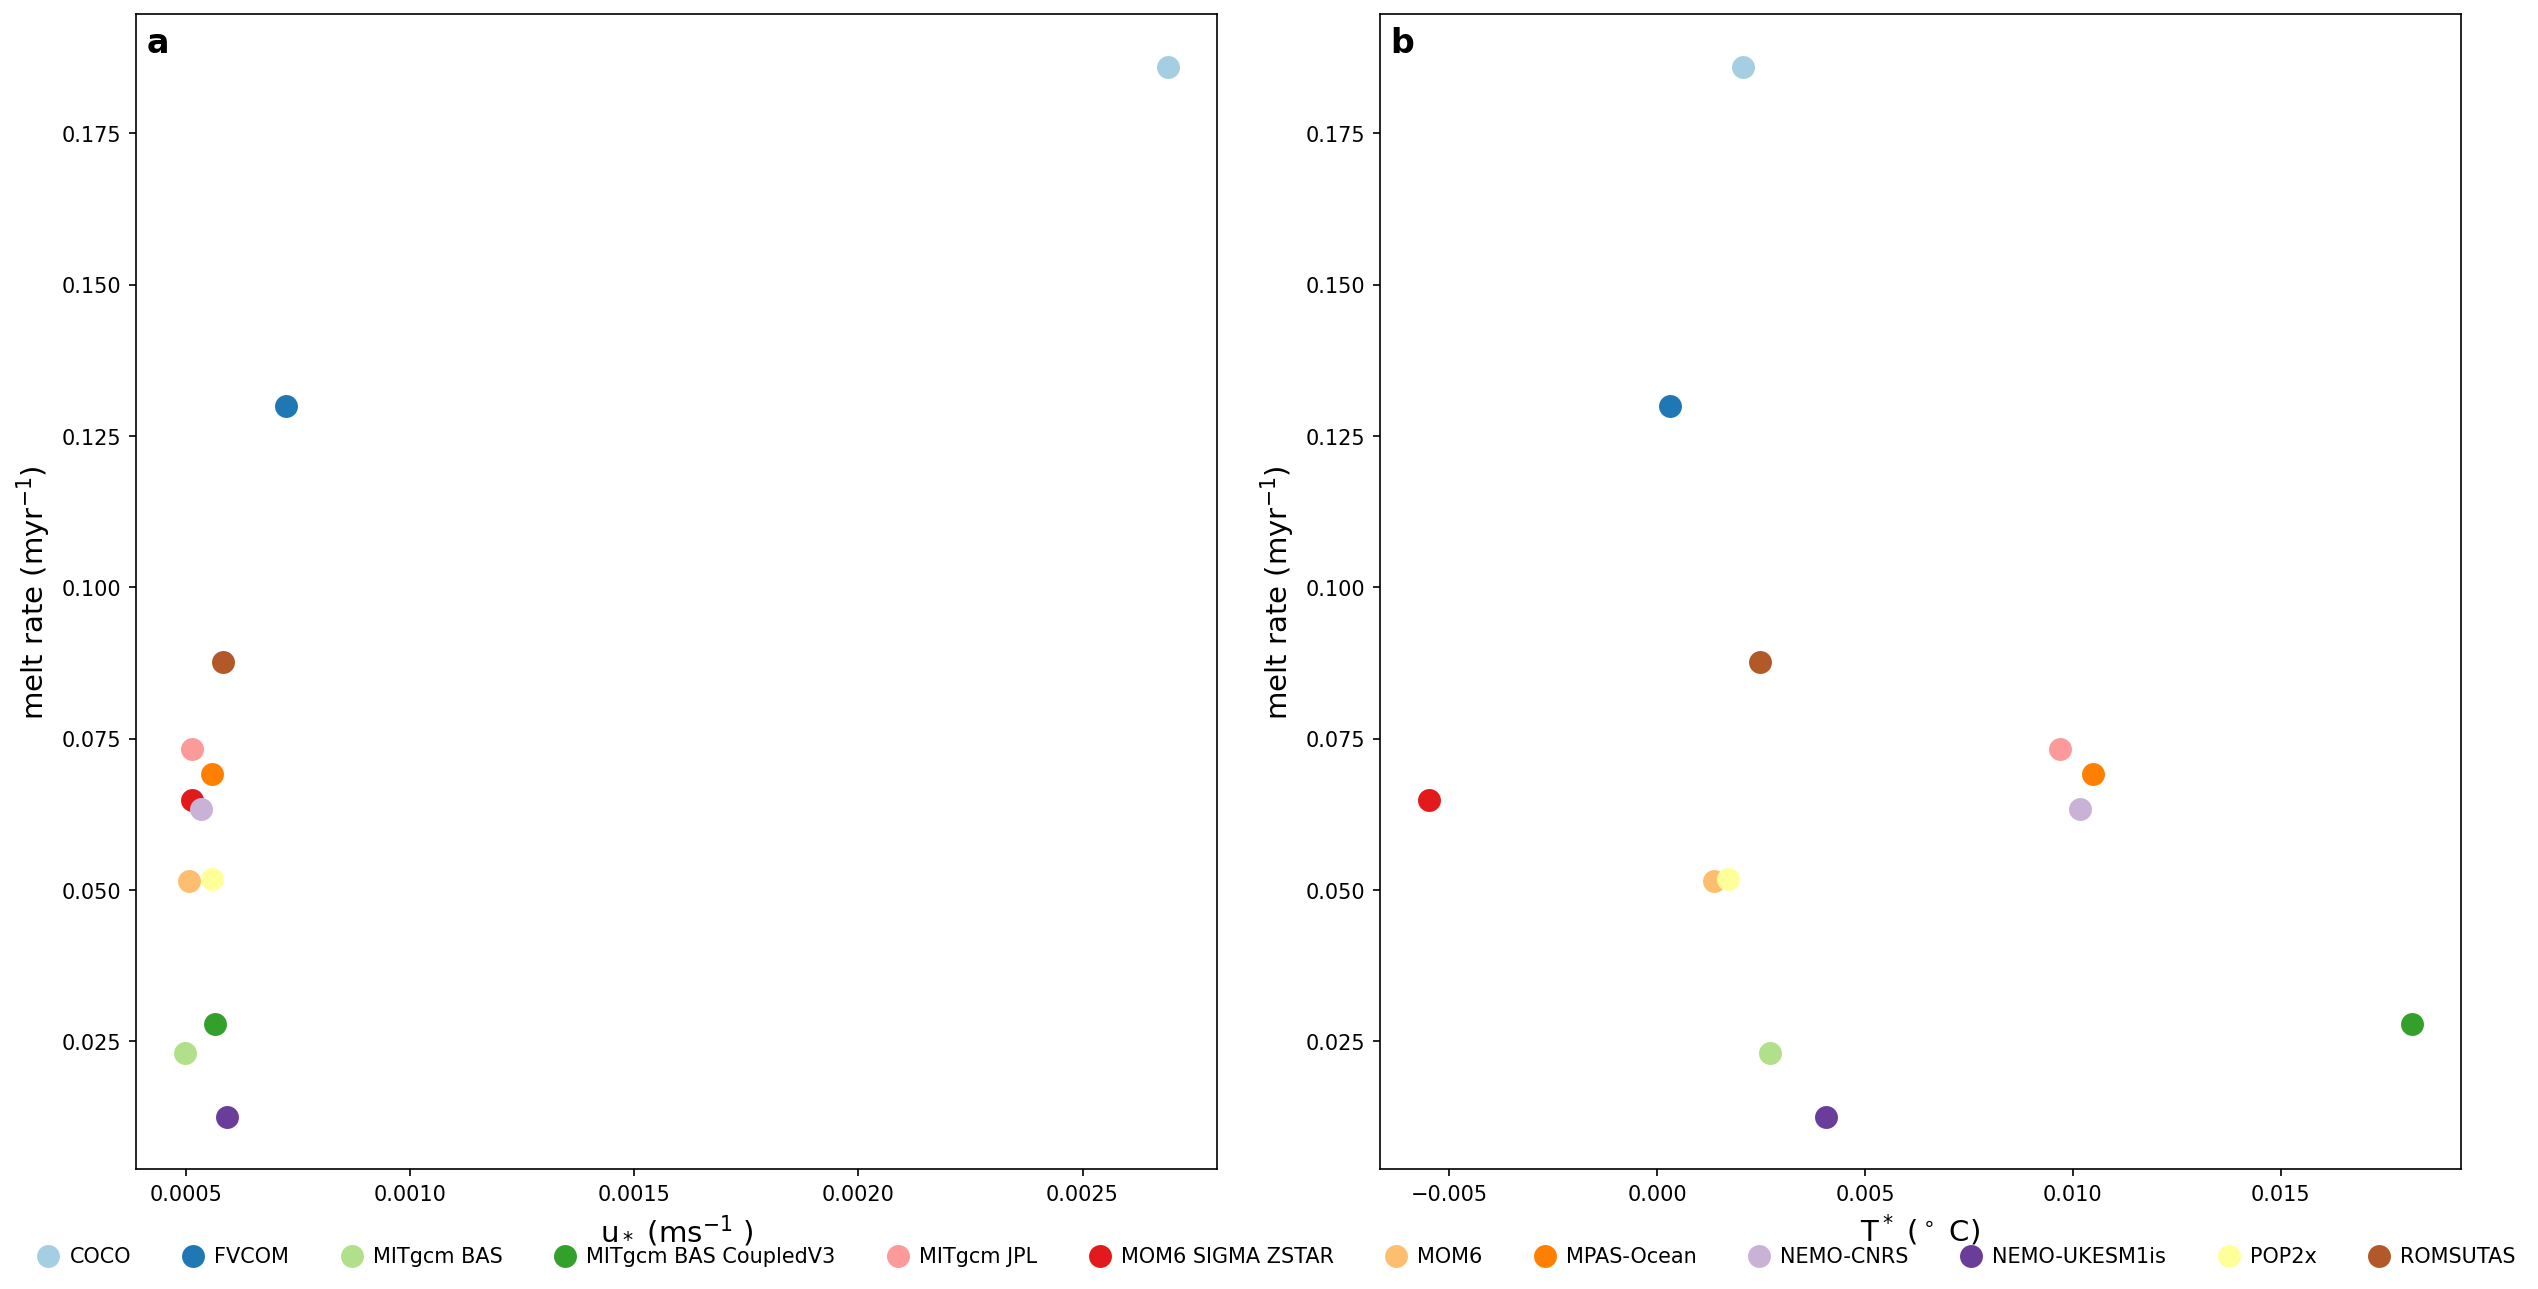

In [10]:
# scatter plot of melt rates aganst T^* and u_* for Ocean2_COM
expt = Ocean2_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
#fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    fr = data.frictionVelocity
    mr = data.meltRate*365*24*60*60 # use this and .where() to mask out parts of domain that aren't melting

    # Mask out parts of the domain that aren't melting
    mr_masked = mr.where(mr < 1e36)#.where(mr != 0)
    fr_masked = fr.where(mr < 1e36)#.where(mr != 0)
    
    # Select the last 12 months
    mr_last_12 = mr_masked.isel(nTime=slice(-13, None))
    fr_last_12 = fr_masked.isel(nTime=slice(-13, None))
    
    # Compute the mean over the last 12 months across 'nx' and 'ny'
    mr_time_mean = mr_last_12.mean(['nx', 'ny', 'nTime'])
    fr_time_mean = fr_last_12.mean(['nx', 'ny', 'nTime'])
   
    #plt.plot(fr_time_mean, mr_time_mean, 'o', label=labels[i],color=modelcolours[i])
    ss = plt.scatter(fr_time_mean, mr_time_mean,label = labels[i], s = 100,color=modelcolours[i])
plt.text(0.01,0.99,'a', fontsize = 16, transform=ax.transAxes, fontweight='bold', va='top')
#plt.ylim(0,0.01)
plt.xlabel(r'u$_*$ ($\mathrm{ms^{-1}}$ )',fontsize=14)
plt.ylabel(r'melt rate ($\mathrm{myr^{-1}}$)',fontsize=14)

ax=fig.add_subplot(gs[1])

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    thr = data.thermalDriving
    mr = data.meltRate*365*24*60*60 # use this and .where() to mask out parts of domain that aren't melting
   # Mask out parts of the domain that aren't melting
    mr_masked = mr.where(mr < 1e36)#.where(mr != 0)
    thr_masked = thr.where(mr < 1e36)#.where(mr != 0)
    
    # Select the last 12 months
    mr_last_12 = mr_masked.isel(nTime=slice(-13, None))
    thr_last_12 = thr_masked.isel(nTime=slice(-13, None))
    
    # Compute the mean over the last 12 months across 'nx' and 'ny'
    mr_time_mean = mr_last_12.mean(['nx', 'ny', 'nTime'])
    thr_time_mean = thr_last_12.mean(['nx', 'ny', 'nTime'])
    
    ss = plt.scatter(thr_time_mean, mr_time_mean,label = labels[i], s = 100,color=modelcolours[i])
plt.text(0.01,0.99,'b', fontsize = 16, transform=ax.transAxes, fontweight='bold', va='top')    
plt.xlabel(r'T$^*$ ($\mathrm{^\circ}$ C)',fontsize=14)
plt.ylabel(r'melt rate ($\mathrm{myr^{-1}}$)',fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.05),frameon=False,ncol=length,handletextpad=0.01)

Text(0, 0.5, '$\\mathrm{Melt\\_div\\_constants (^\\circ C ms^{-1} )}$')

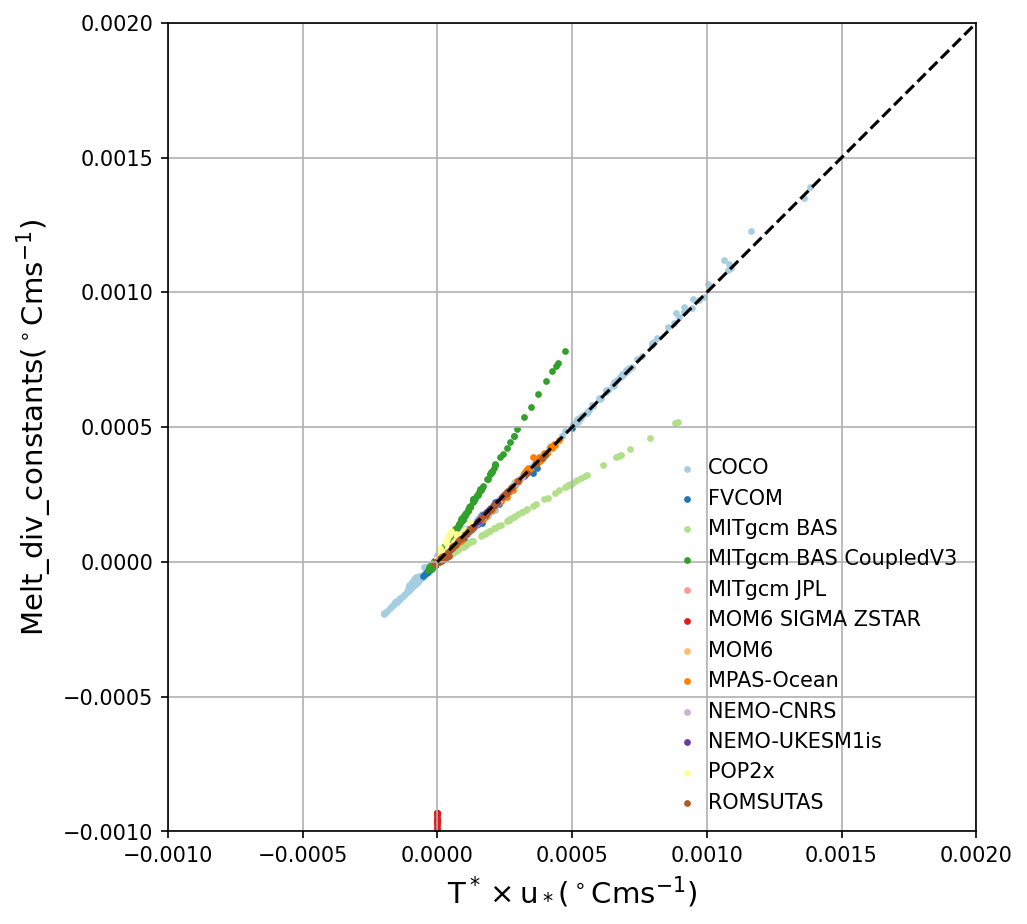

In [16]:
# scatter plot of melt rates divided by constants aganst T^* times u_* for Ocean2_COM

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))
    melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(melt_div_constants, tstar_av*ustar_av,s=5,color=modelcolours[i])
    ax.scatter(melt_div_constants[-1], tstar_av[-1]*ustar_av[-1], s=5,label=labels[i],color=modelcolours[i])
    
ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_xlim((-.001,0.002))
ax.set_ylim((-.001,0.002))
ax.set_aspect('equal')
ax.grid()
plt.xlabel(r'$\mathrm{T^*\times u_* (^\circ C  ms^{-1} )}$',fontsize=14)
plt.ylabel(r'$\mathrm{Melt\_div\_constants (^\circ C ms^{-1} )}$',fontsize=14)

# focus on BAS ones

In [29]:
!ls /g/data/x77/cy8964/ISOMIP+Data-new/MITgcm-BAS/Ocean0-2\ COM

!ls /g/data/x77/cy8964/ISOMIP+Data-new/MITgcm_BAS_Coupled/Ocean0-2\ COM


 fixFiles.bash		    Ocean2_COM_MITgcm_BAS.nc
 Ocean0_COM_MITgcm_BAS.nc  'Summary of Ocean0_COM_MITgcm_BAS.pdf'
 Ocean1_COM_MITgcm_BAS.nc
'MITgcm_BAS_COUPLED - Ocean0-4 - COM.pdf'   Ocean1_COM_MITgcm_BAS_Coupled_V2.nc
 Ocean0_COM_MITgcm_BAS_Coupled.nc	    Ocean1_COM_MITgcm_BAS_CoupledV3.nc
 Ocean0_COM_MITgcm_BAS_Coupled_V2.nc	    Ocean2_COM_MITgcm_BAS_Coupled.nc
 Ocean0_COM_MITgcm_BAS_CoupledV3.nc	    Ocean2_COM_MITgcm_BAS_Coupled_V2.nc
 Ocean1_COM_MITgcm_BAS_Coupled.nc	    Ocean2_COM_MITgcm_BAS_CoupledV3.nc


In [49]:
Ocean0_BAS = np.array([
       'MITgcm-BAS/Ocean0-2 COM/Ocean0_COM_MITgcm_BAS.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean0_COM_MITgcm_BAS_Coupled.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean0_COM_MITgcm_BAS_Coupled_V2.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean0_COM_MITgcm_BAS_CoupledV3.nc'])

Ocean1_BAS = np.array([
       'MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_Coupled.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_Coupled_V2.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc'])

Ocean2_BAS = np.array([
       'MITgcm-BAS/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS_Coupled.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS_Coupled_V2.nc',
       'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS_CoupledV3.nc'])

In [50]:
GammaT={
'MITgcm BAS':1.9e-2,
'MITgcm BAS Coupled':2.1e-2,
'MITgcm BAS Coupled V2':2.1e-2,
'MITgcm BAS CoupledV3':2.1e-2,
}

['MITgcm BAS', 'MITgcm BAS Coupled', 'MITgcm BAS Coupled V2', 'MITgcm BAS CoupledV3']


Text(0, 0.5, '$\\mathrm{Melt\\_div\\_constants (^\\circ C ms^{-1} )}$')

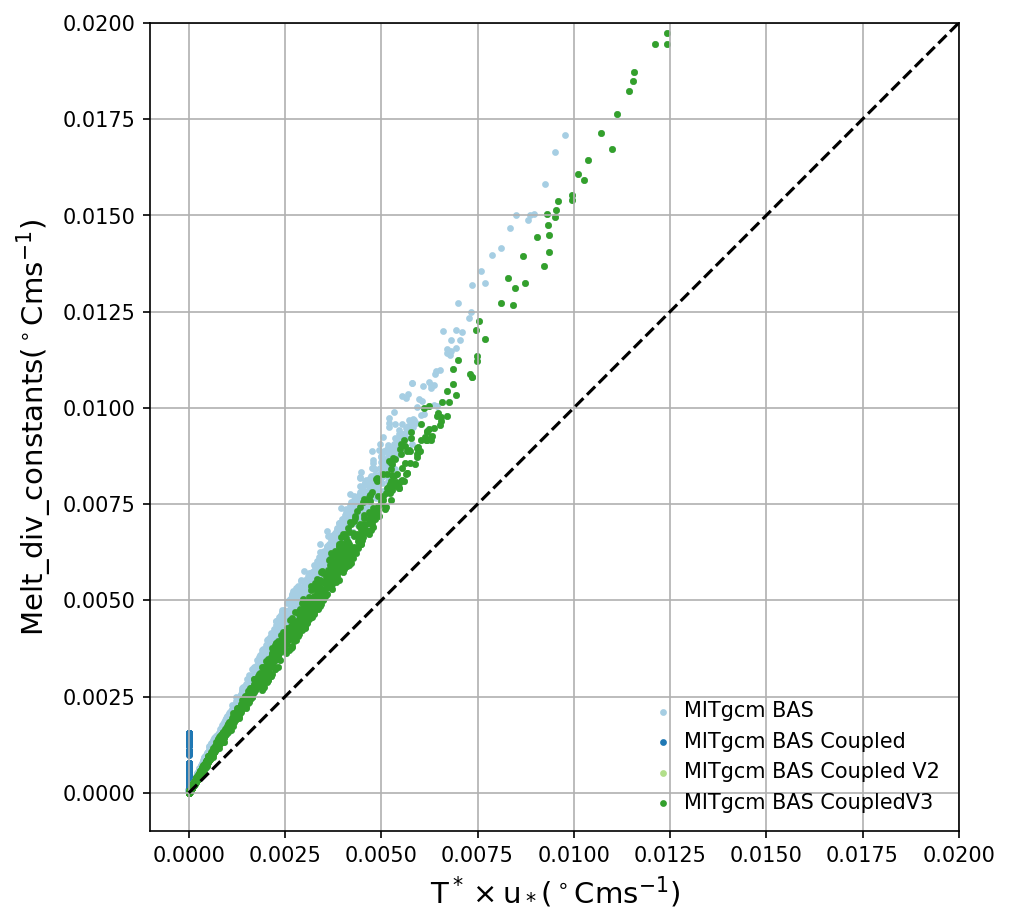

In [53]:
# scatter plot of melt rates divided by constants aganst T^* times u_* for Ocean1_COM

expt = Ocean0_BAS
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
print(labels)
length = len(expt)


gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))
    melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(melt_div_constants, tstar_av*ustar_av,s=5,color=modelcolours[i])
    ax.scatter(melt_div_constants[-1], tstar_av[-1]*ustar_av[-1], s=5,label=labels[i],color=modelcolours[i])
    
ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_xlim((-.001,0.02))
ax.set_ylim((-.001,0.02))
ax.set_aspect('equal')
ax.grid()
plt.xlabel(r'$\mathrm{T^*\times u_* (^\circ C  ms^{-1} )}$',fontsize=14)
plt.ylabel(r'$\mathrm{Melt\_div\_constants (^\circ C ms^{-1} )}$',fontsize=14)


['MITgcm BAS', 'MITgcm BAS Coupled', 'MITgcm BAS Coupled V2', 'MITgcm BAS CoupledV3']


Text(0, 0.5, '$\\mathrm{Melt\\_div\\_constants (^\\circ C ms^{-1} )}$')

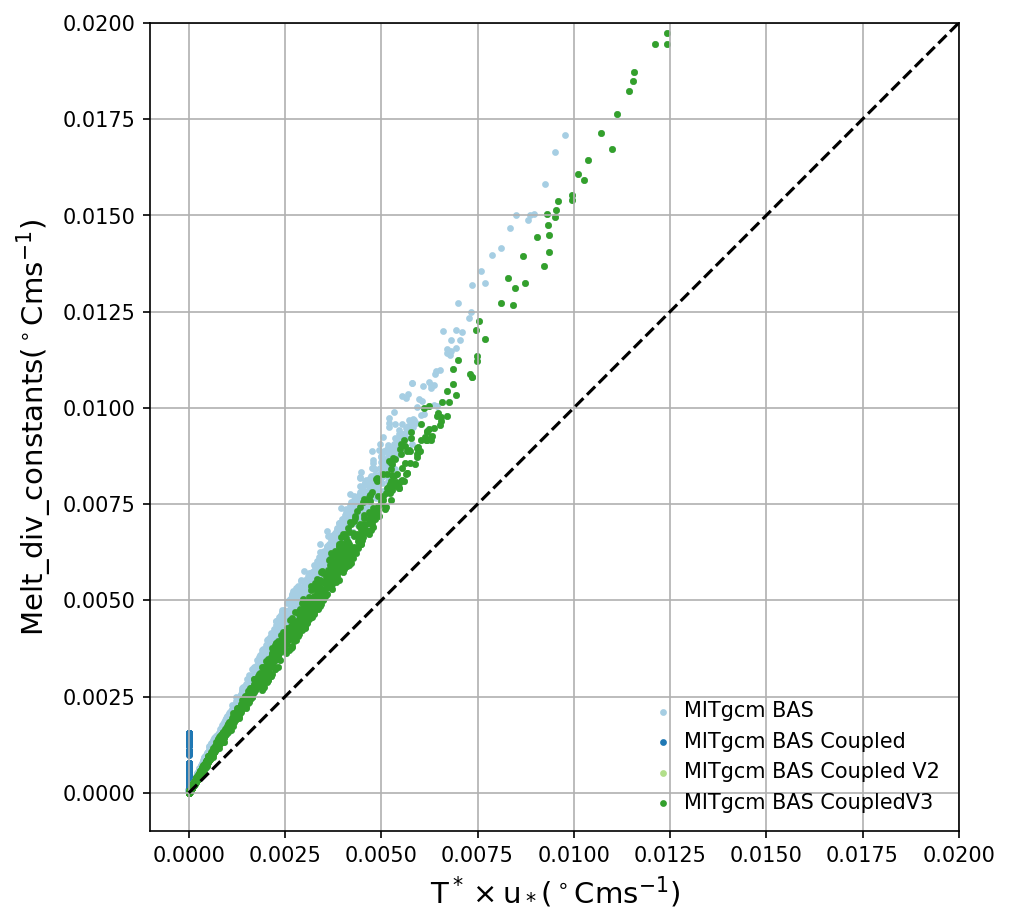

In [53]:
# scatter plot of melt rates divided by constants aganst T^* times u_* for Ocean1_COM

expt = Ocean0_BAS
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
print(labels)
length = len(expt)


gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))
    melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(melt_div_constants, tstar_av*ustar_av,s=5,color=modelcolours[i])
    ax.scatter(melt_div_constants[-1], tstar_av[-1]*ustar_av[-1], s=5,label=labels[i],color=modelcolours[i])
    
ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_xlim((-.001,0.02))
ax.set_ylim((-.001,0.02))
ax.set_aspect('equal')
ax.grid()
plt.xlabel(r'$\mathrm{T^*\times u_* (^\circ C  ms^{-1} )}$',fontsize=14)
plt.ylabel(r'$\mathrm{Melt\_div\_constants (^\circ C ms^{-1} )}$',fontsize=14)


['MITgcm BAS', 'MITgcm BAS Coupled', 'MITgcm BAS Coupled V2', 'MITgcm BAS CoupledV3']


Text(0, 0.5, '$\\mathrm{Melt\\_div\\_constants (^\\circ C ms^{-1} )}$')

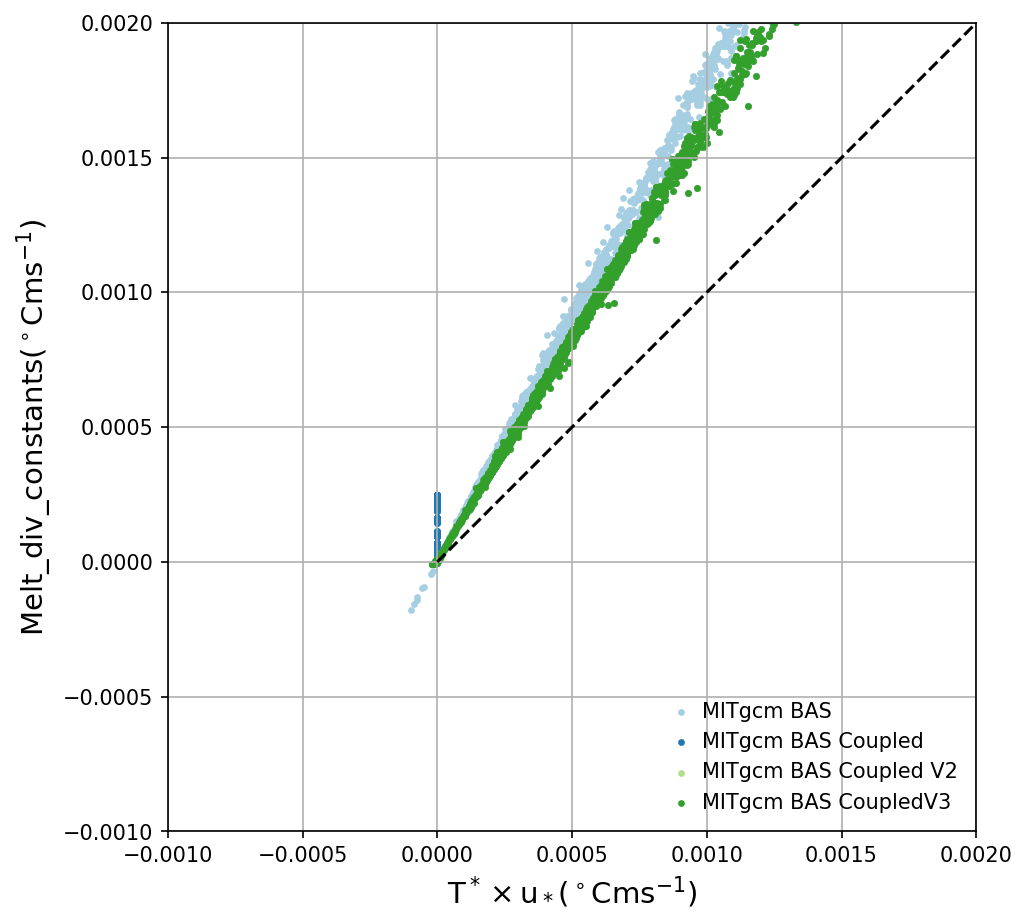

In [58]:
# scatter plot of melt rates divided by constants aganst T^* times u_* for Ocean2_COM

expt = Ocean1_BAS
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
print(labels)
length = len(expt)

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(10,7),facecolor='w',dpi = 150)
ax=fig.add_subplot(gs[0])

for i in np.arange(length):
    #print(i)
    #print(basedrive+expt[i])
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))
    melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    ax.scatter(melt_div_constants, tstar_av*ustar_av,s=5,color=modelcolours[i])
    ax.scatter(melt_div_constants[-1], tstar_av[-1]*ustar_av[-1], s=5,label=labels[i],color=modelcolours[i])
    
ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
ax.legend(loc='lower right',frameon=False,handletextpad=0.01)

ax.set_xlim((-.001,0.002))
ax.set_ylim((-.001,0.002))
ax.set_aspect('equal')
ax.grid()
plt.xlabel(r'$\mathrm{T^*\times u_* (^\circ C  ms^{-1} )}$',fontsize=14)
plt.ylabel(r'$\mathrm{Melt\_div\_constants (^\circ C ms^{-1} )}$',fontsize=14)